**Install causalml package**

In [2]:
!pip install causalml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 535 kB 10.6 MB/s 
     |████████████████████████████████| 76 kB 5.2 MB/s 
     |████████████████████████████████| 575 kB 75.2 MB/s 
     |████████████████████████████████| 1.8 MB 65.9 MB/s 
     |████████████████████████████████| 727 kB 74.6 MB/s 
     |████████████████████████████████| 52 kB 1.5 MB/s 
     |████████████████████████████████| 132 kB 74.5 MB/s 
  Created wheel for causalml: filename=causalml-0.13.0-cp38-cp38-linux_x86_64.whl size=1482403 sha256=38c0cc360012bf3eb45febfb5ea182e500ff8c2f77d70ad1c323f7d8f0154897
  Stored in directory: /root/.cache/pip/wheels/69/88/0f/dacafa2cf04c6eeea7172fb8f4d41b82330f5ec9edf807d167
Successfully built causalml


**Install causalml, pandas and numpy packages**

In [3]:
import numpy as np
import pandas as pd

from causalml.inference.tree import UpliftTreeClassifier,CausalRandomForestRegressor
from causalml.inference.tree import uplift_tree_string, uplift_tree_plot
from causalml.metrics import qini_score
from sklearn.model_selection import train_test_split,KFold

from causalml.metrics import plot_gain
from IPython.display import Image

ERROR:duecredit:Failed to import duecredit due to No module named 'duecredit'


**Import payback uplift file (which extracts the subset of cases with credit score = 0 & payback period = 120 or 126 months from the event log)**

In [4]:
filepath = "https://raw.githubusercontent.com/etioro/DiagnosticProcessMining/main/BPIC17_payback_uplift.csv"
df = pd.read_csv(filepath)

In [5]:
df.head

<bound method NDFrame.head of                      case_id  accepted  first_withdrawal_amount  monthly_cost  \
0      Application_828200680         1                  35000.0        366.08   
1     Application_1966208034         1                      0.0        400.00   
2      Application_857715587         1                      0.0        400.00   
3      Application_798605556         1                  35000.0        366.08   
4     Application_1370588808         1                  25000.0        261.48   
...                      ...       ...                      ...           ...   
2832    Application_61571417         1                  70000.0        712.76   
2833  Application_1722592475         1                  29845.0        438.85   
2834   Application_886482893         1                  75000.0        763.67   
2835  Application_1669672980         1                   6000.0        350.00   
2836  Application_1229851589         0                  25000.0        254.56  

**Drop any null value and check that there are no null value. The output should be 'False'**

In [ ]:
df.dropna(inplace=True)
df.isnull().values.any()

False

**Create, fit and plot the uplift model **


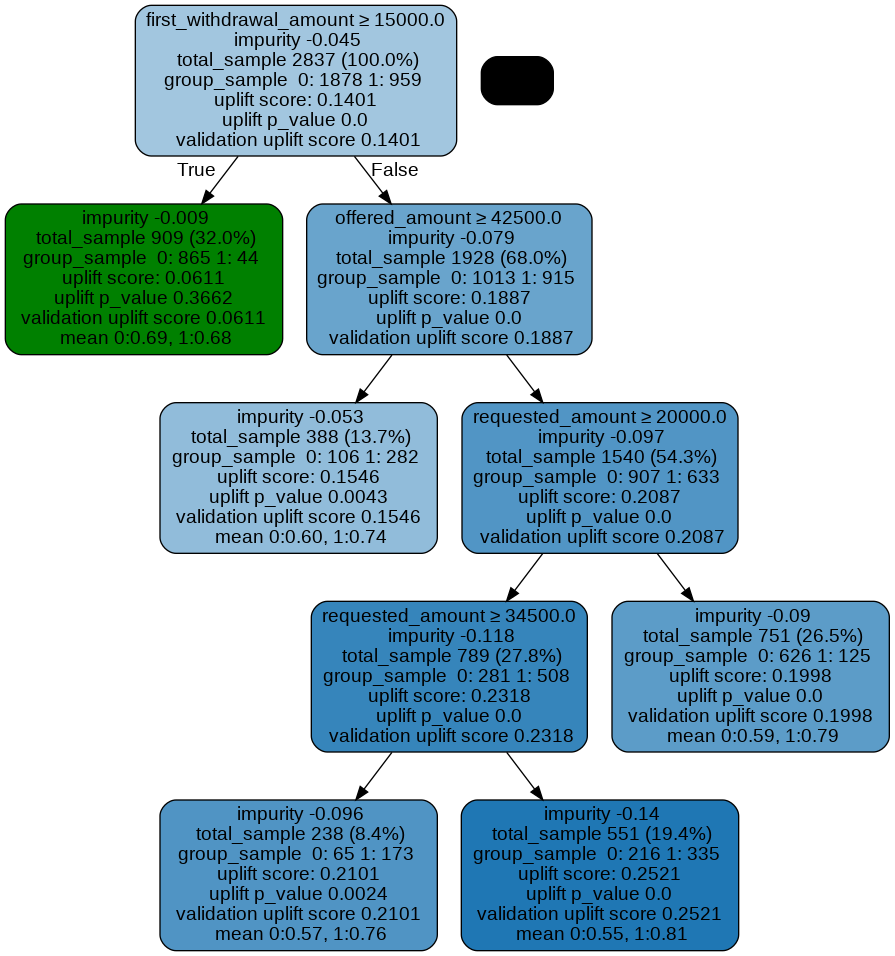

In [ ]:
uplift_model = UpliftTreeClassifier(max_features=6,max_depth=5, min_samples_leaf=200,control_name='0')
df['pb_treat'] = df['pb_treat'].astype(str)
x_names = ['offer_amt_less_than_requested', 'monthly_cost', 'offered_amount','first_withdrawal_amount', 'credit_score','requested_amount','payback_period']
uplift_model.fit(df[x_names].values,treatment= df['pb_treat'].values,y=df['accepted'].values)

graph = uplift_tree_plot(uplift_model.fitted_uplift_tree, x_names)
Image(graph.create_png())